<a href="https://colab.research.google.com/github/Spica08/deep-learning-from-scratch-5/blob/main/step1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# setup
import numpy as np
import matplotlib.pyplot as plt

# 1章 正規分布

## 1.1 確率の基礎

### 1.1.1 確率変数と確率分布
**確率変数** -> 取りうる値が確率的に決まる変数  
**確率分布** -> 起こりうるすべての値に対してその確率が示されたもの  

サイコロで例えると、出る目xが確率変数、それぞれの目が出る確率p(x)が確率分布。この時、「確率変数xは確率分布p(x)に従う」という。  
確率分布(離散)が満たすべき条件は次の2つ  
1. それぞれの値が発生する確率がすべて0以上1以下  
$0 \leqq p(x_k) \leqq 1$
2. すべての確率の和は1  
$\sum_{k=1}^N p(x_k) = 1$  

### 1.1.2 確率分布の種類
確率分布 -> 「離散型」、「連続型」の2種類。p(x)が示す意味が異なり、それぞれ**確率**、**確率密度**を表す。連続型確率分布の場合は取りうる値の積分値により確率を求める。  
確率分布(連続)が満たすべき条件は次の2つ  
1. すべてのxおいて確率密度が0以上  
$p(x) \geqq 0$
2. 確率密度の積分値は1  
$\int_{-\infty}^\infty p(x)dx = 1$  

### 1.1.3 期待値と分散


## 1.2 正規分布

### 1.2.1 正規分布の確率密度関数
平均μ、標準偏差σの正規分布の確率密度関数は以下  
$p(x) = \frac{1}{\sqrt{2\pi\sigma}} \exp(-\frac{(x-\mu)^2}{2\sigma^2})$  
以下も同様の意味を示す  
$p(x;\mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma}} \exp(-\frac{(x-\mu)^2}{2\sigma^2})$  
正規分布は特に以下の表記も存在する  
$\mathcal{N}(x;\mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma}} \exp(-\frac{(x-\mu)^2}{2\sigma^2})$  

### 1.2.2 正規分布のコード

In [2]:
# 平均0、標準偏差1の正規分布
def normal(x, mu = 0, sigma = 1):
    y = 1 / (np.sqrt(2 * np.pi * sigma)) * np.exp(-(x - mu)**2 / (2 * sigma **2))
    return y

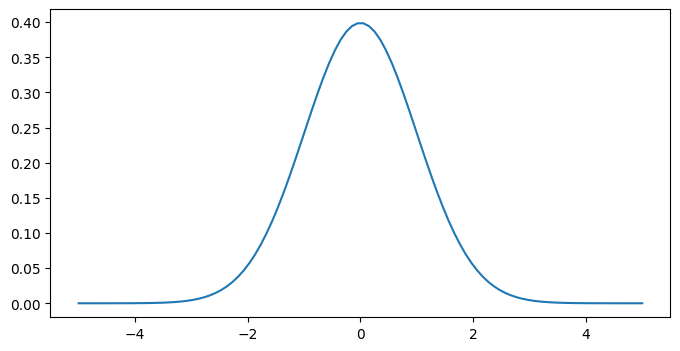

In [3]:
# visualize
x = np.linspace(-5, 5, 100)
y = normal(x)

fig, ax = plt.subplots(figsize = (8, 4))
ax.plot(x, y)
fig.show()

### 1.2.3 パラメータの役割

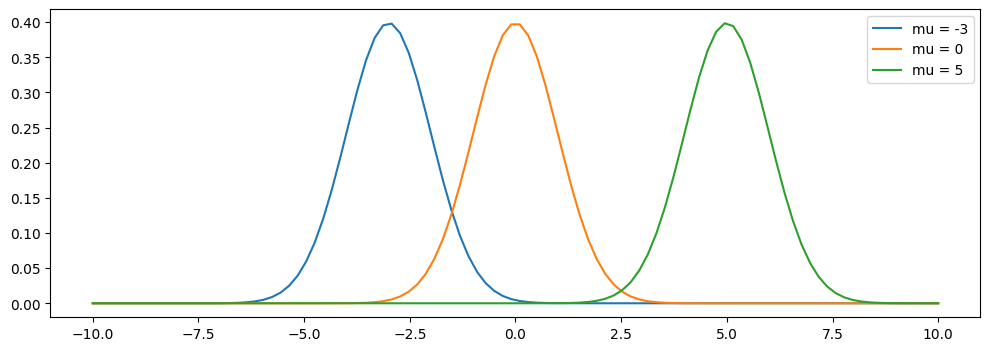

In [4]:
x = np.linspace(-10, 10, 100)
y0 = normal(x, mu = -3)
y1 = normal(x, mu = 0)
y2 = normal(x, mu = 5)

# effect of parameter "mu"
fig, ax = plt.subplots(figsize = (12, 4))
ax.plot(x, y0)
ax.plot(x, y1)
ax.plot(x, y2)
ax.legend(["mu = -3", "mu = 0", "mu = 5"])
fig.show()

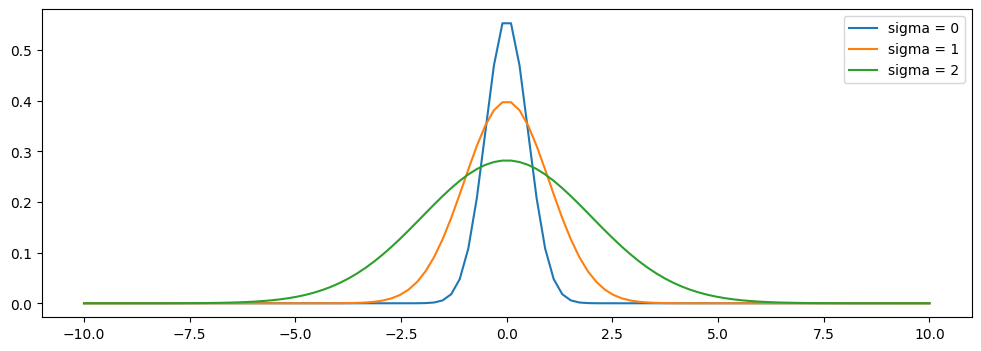

In [5]:
x = np.linspace(-10, 10, 100)
y0 = normal(x, sigma = 0.5)
y1 = normal(x, sigma = 1)
y2 = normal(x, sigma = 2)

# effect of parameter "sigma"
fig, ax = plt.subplots(figsize = (12, 4))
ax.plot(x, y0)
ax.plot(x, y1)
ax.plot(x, y2)
ax.legend(["sigma = 0", "sigma = 1", "sigma = 2"])
fig.show()

## 1.3 中心極限定理

### 1.3.1 中心極限定理とは
ある確率分布p(x)から独立に生成されたN個のデータを{x1, x2, ..., xN}とした時の**サンプル平均(標本平均)**は以下の式で表される。  
$\bar{x} = \frac{x^{(1)} + x^{(2)} + \cdots + x^{(3)}}{N}$  
ここで、p(x)がどのような確率分布でもサンプル平均$\bar{x}$の分布はNが大きくなると正規分布に近づく(**中心極限定理**)。この時の分散は元の確率分布p(x)の分散の1/N倍になる。  


### 1.3.2 中心極限定理の実験

p(x)として一様分布を設定

In [6]:
N = 3 # sample size

xs = []
for n in range(N):
    x = np.random.rand() # uniform distribution
    xs.append(x)

x_mean = np.mean(xs)
print(x_mean)

0.7170661623053559


この時の平均の分布を確認する。

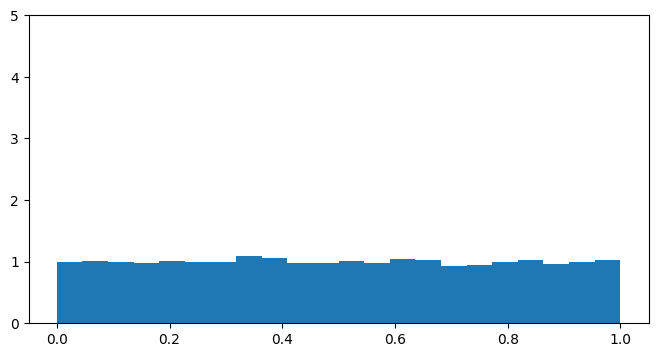

In [7]:
x_means = []
N = 1 # sample size

for _ in range(10000):
    xs = []
    for n  in range(N):
        x = np.random.rand()
        xs.append(x)
    mean = np.mean(xs)
    x_means.append(mean)

fig, ax = plt.subplots(figsize = (8, 4))
ax.hist(x_means, bins = "auto", density = True)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(0, 5)
fig.show()

N = 1では一様分布のまま

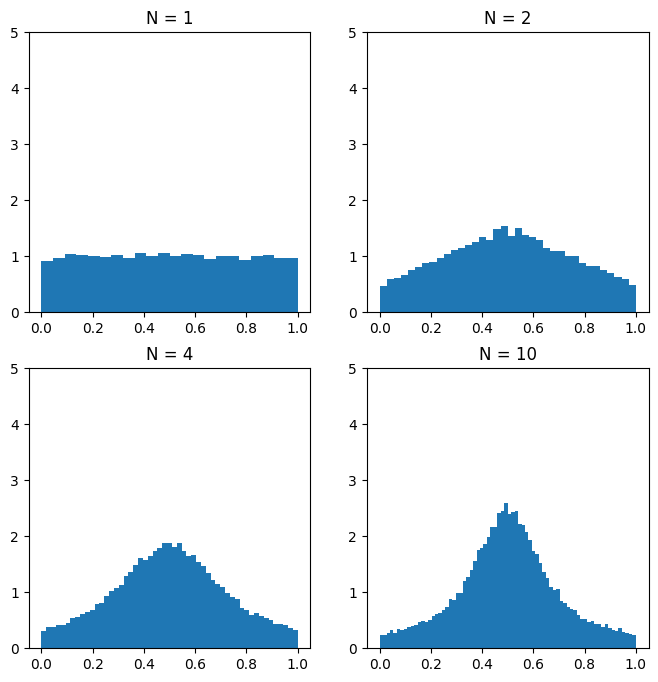

In [8]:
x_means = []
N = [1, 2, 4, 10] # sample size

fig, axes = plt.subplots(figsize = (8, 8), ncols = 2, nrows = 2)
for sample_size, ax in zip(N, axes.ravel()):
    for _ in range(10000):
        xs = []
        for n  in range(sample_size):
            x = np.random.rand()
            xs.append(x)
        mean = np.mean(xs)
        x_means.append(mean)
    ax.hist(x_means, bins = "auto", density = True)
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(0, 5)
    ax.set_title(f"N = {sample_size}")

fig.show()

## 1.4 サンプル和の確率分布

### 1.4.1 サンプル和の期待値と分散
$\bar{x}$が正規分布に近づく時、サンプル和$N\bar{x}$も正規分布に近づく。この時、元の分布の期待値を$\mu$、分散を$\sigma^2$とすると、    

\begin{align}
 E[N\bar{x}] = NE[\bar{x}] = N\mu
\end{align}  

\begin{align}
 Var[N\bar{x}] &= E[(N\bar{x} - N\mu)^2] \\
 &=E[N^2(\bar{x} - \mu)^2] \\ &= N^2Var[\bar{x}] \\ &= N\sigma^2
\end{align}

### 1.4.2 コードで確かめる

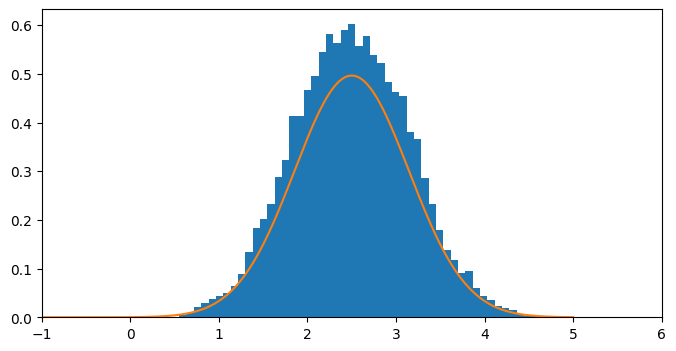

In [22]:
x_sums = []
N = 5 # sample size

for _ in range(10000):
    xs = []
    for n  in range(N):
        x = np.random.rand()
        xs.append(x)
    t = np.sum(xs)
    x_sums.append(t)

x_norm = np.linspace(-5, 5, 1000)
y_norm = normal(x_norm, mu = N / 2, sigma = np.sqrt(N / 12))

fig, ax = plt.subplots(figsize = (8, 4))
ax.hist(x_sums, bins = "auto", density = True)
ax.plot(x_norm, y_norm)
ax.set_xlim(-1, 6)
fig.show()

### 1.4.3 一様分布の平均と分散
0 - 1の間の一様分布について、

\begin{align}
 \mu &= \int_{-\infty}^{\infty} xp(x)dx \\
 &= \int_{-\infty}^{0} xp(x)dx + \int_{0}^{1} xp(x)dx + \int_{1}^{\infty} xp(x)dx \\
 &= \int_{0}^{1} xdx \\
 &= \left[\frac{1}{2}x^2\right]_{0}^{1} \\
 &= \frac{1}{2} \\
 \sigma^2 &= \int_{-\infty}^{\infty} (x - \mu)^2p(x)dx \\
 &= \int_{0}^{1} (x - \mu)^2dx \\
 &= \int_{0}^{1} (x - \frac{1}{2})^2dx \\
 &= \left[\frac{1}{3}x^3 - \frac{1}{2}x^2 + \frac{1}{4}\right]_{0}^{1} \\
 &= \frac{1}{12}
\end{align}  

## 1.5 身の回りの正規分布
略